## Bar Plots

For variables measured on a nominal or an ordinal scale it's common to use a bar plot to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:

+ One set containing the unique values.
+ Another set containing the frequency for each unique value.


We can use `Series.value_counts()` to generate the table, and then use the `Series.plot.bar()` method on the resulting table to generate a bar plot. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
path = "data/wnba.csv"
wnba = pd.read_csv(path)

<AxesSubplot:>

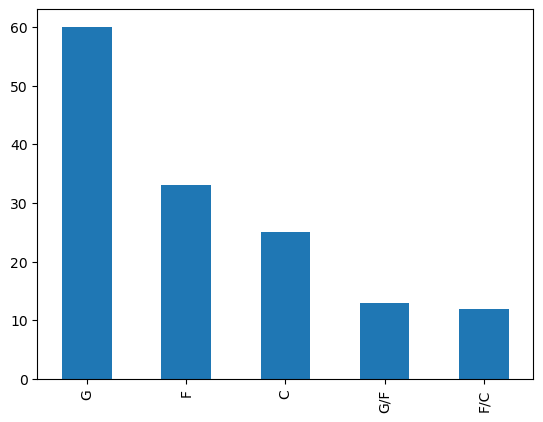

In [20]:
wnba['Pos'].value_counts().plot.bar()

The `Series.plot.bar()` method generates a vertical bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the `Series.plot.barh()` method:


<AxesSubplot:>

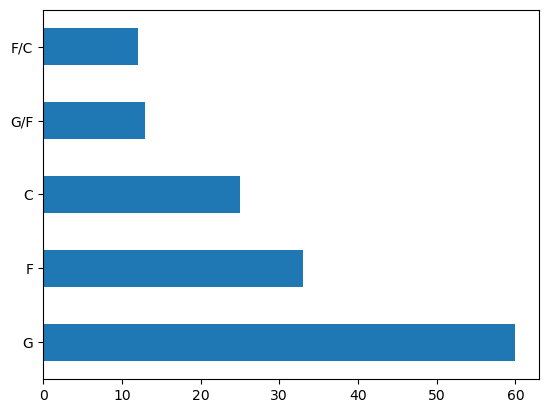

In [21]:
wnba['Pos'].value_counts().plot.barh()

### Rotating Axes

In [22]:
# wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)

<AxesSubplot:title={'center':'Number of players in WNBA by position'}>

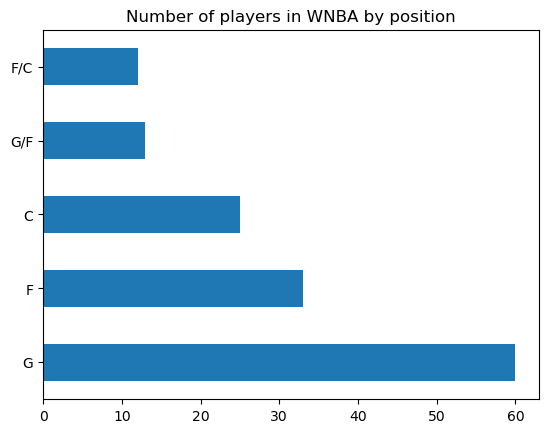

In [23]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

## Pie chart
+ We can generate pie charts using the `Series.plot.pie()`

<AxesSubplot:ylabel='Pos'>

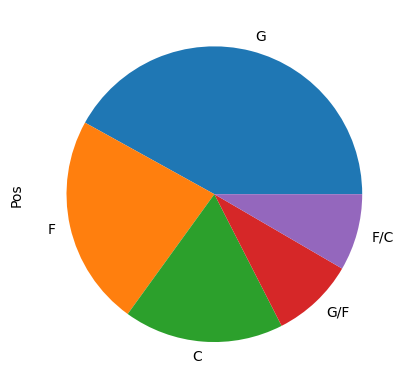

In [24]:
wnba['Pos'].value_counts().plot.pie()

## Customizing Pie Chart

+ To give a pie chart the right shape, we need to specify equal values for height and width in the figsize parameter of `Series.plot.pie()`
+ `plt.pylabel()` used to change axis labels

Text(0, 0.5, '')

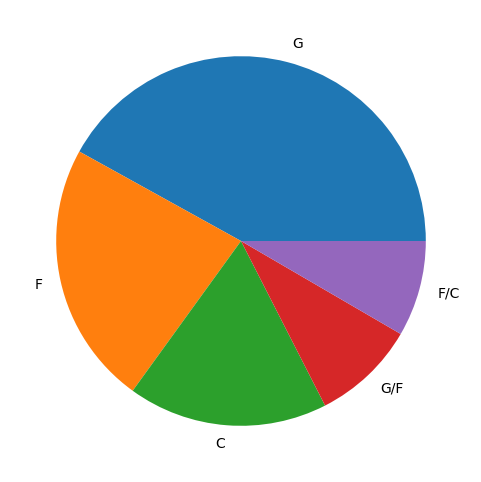

In [25]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6))
plt.ylabel('')

Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the autopct parameter. This parameter accepts Python string formatting, and we'll use the string '`%.1f%%`' to have percentages displayed with a precision of one decimal place. Let's break down this string formatting:

![formatting](img/s1m4_string.svg)

<AxesSubplot:ylabel='Pos'>

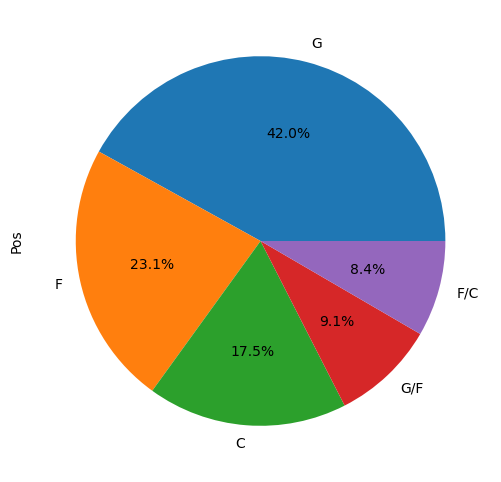

In [26]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Text(0, 0.5, '')

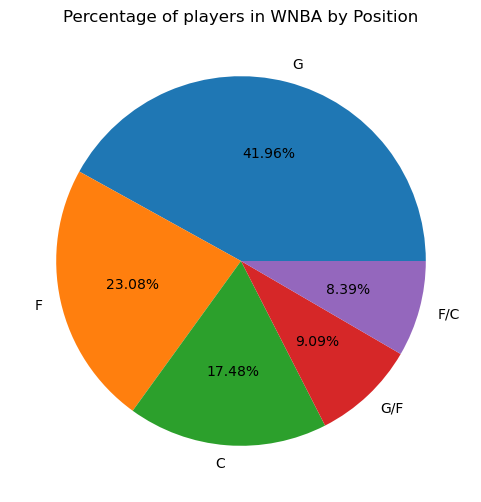

In [27]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',
                                           title="Percentage of players in WNBA by Position")
plt.ylabel('')

## Histogram

To visualize the distribution of the PTS variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the histogram.

To generate a histogram for the PTS variable, we can use the `Series.plot.hist()` method directly on the wnba['PTS'] column

<AxesSubplot:ylabel='Frequency'>

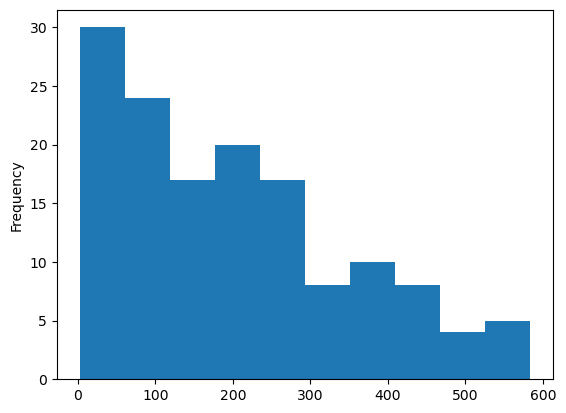

In [28]:
wnba['PTS'].plot.hist()

Seeing details

<AxesSubplot:ylabel='Frequency'>

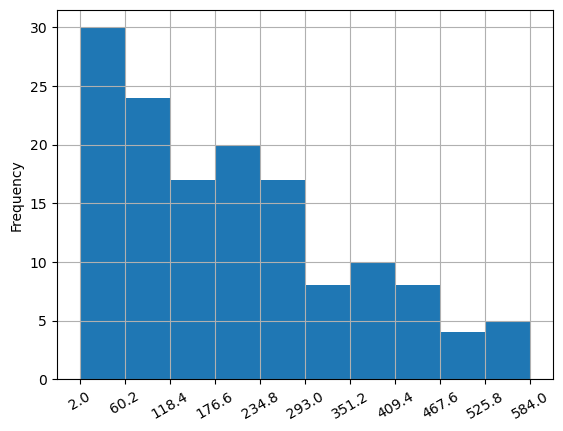

In [29]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

## Task

Generate a histogram for the Games Played variable, and customize it in the following way:

+ Each bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.
+ Add the title "The distribution of players by games played".
+ Add a label to the x-axis named "Games played".


Text(0.5, 0, 'Games Played')

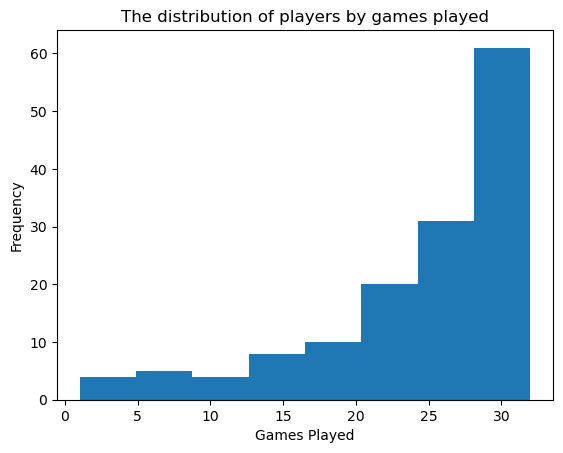

In [30]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8, title="The distribution of players by games played")
plt.xlabel("Games Played")

## Skewed Distributions

Both these histograms show skewed distributions. In a skewed distribution:

+ The values pile up toward the end or the starting point of the range, making up the body of the distribution.
+ Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.

![Skewed Distribution](img/s1m4_body_tail.svg)


f the tail points to the left, then the distribution is said to be __left skewed__. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called __negatively skewed__

If the tail points to the right, then the distribution is __right skewed__. The distribution is sometimes also said to be __positively skewed__ because the tail points in the direction of positive numbers.

![DISTROS](img/s1m4_skewed_distros_v2.svg)

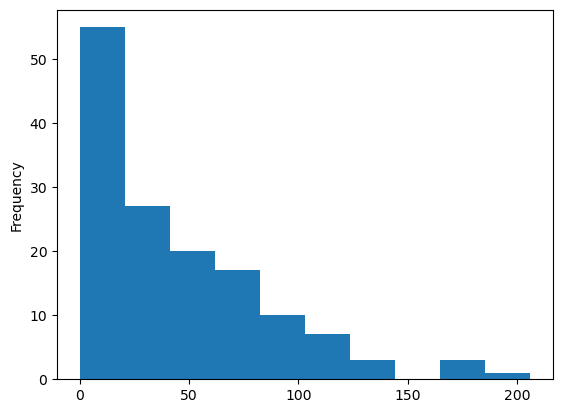

In [31]:
wnba['AST'].plot.hist()
assists_distro = "right skewed"

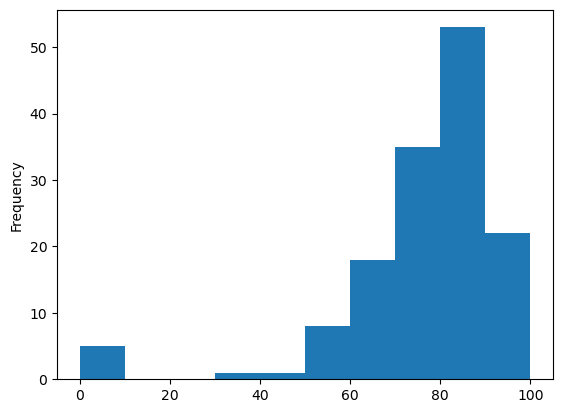

In [32]:
wnba["FT%"].plot.hist()
ft_percent_distro = 'left skewed'

## Symmetrical Distributions

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a __normal distribution__ (also called __Gaussian distribution__).

![normal](img/s1m4_normal.svg)


Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a __uniform distribution__

![uniform](img/s1m4_uniform.svg)


<AxesSubplot:ylabel='Frequency'>

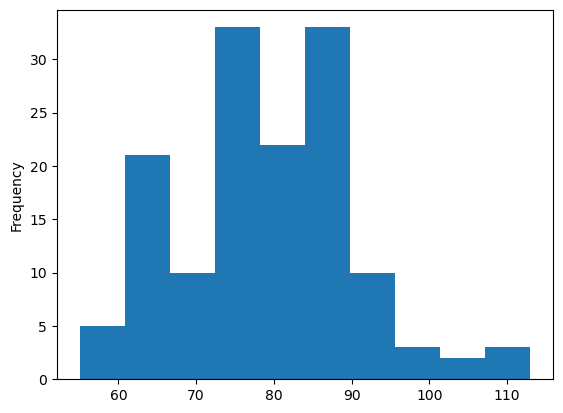

In [33]:
wnba['Weight'].plot.hist()

## Grouped Bar Plot

We can generate a grouped bar plot using the `seaborn.countplot()` function from the seaborn module

In [18]:
import seaborn as sns

Generate the plot with `sns.countplot()`. We'll use the following parameters for this function:

+ `x` — specifies as a string the name of the column we want on the x-axis. We'll place the Exp_ordinal column on the x-axis.
+   `hue` — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the Pos column.
+ `data`- specifies the name of the variable which stores the data set. We stored the data in a variable named wnba.


<AxesSubplot:xlabel='Team', ylabel='count'>

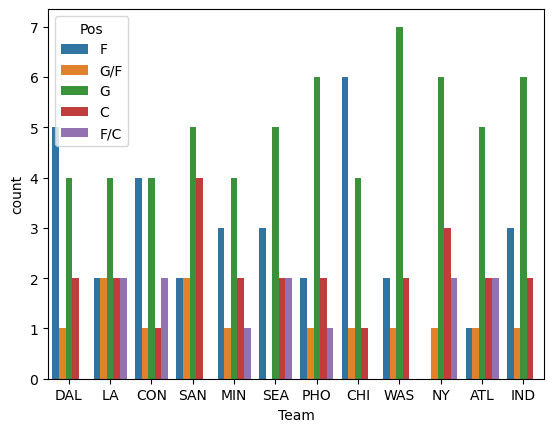

In [38]:
sns.countplot(x = 'Team', hue = 'Pos', data = wnba)

DO older players play less?

When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season:

In [39]:
wnba['MIN'].mean()

496.97202797202794

Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:

In [40]:
wnba['Age'].mean()

27.076923076923077

To answer the question


An ordinal variable which labels each player as "young" or "old". If the player is 27 or over, we'll label her "old", otherwise the label is "young".

An ordinal variable which describes whether the minutes played is below or above average (or equal to the average). If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average".


In the code below, we'll use lambda functions to describe quickly the labeling logic above and Series.apply() to apply the lambda functions on the Age and MIN columns. We'll name the two resulting columns age_mean_relative and min_mean_relative.

In [42]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')



Generate a grouped bar plot to confirm or reject our hypothesis. Using sns.countplot():

+ Place the age_mean_relative variable on the x-axis. The age_mean_relative and min_mean_relative are already defined.
+ Generate the frequency distributions for the min_mean_relative variable.

<AxesSubplot:xlabel='age_mean_relative', ylabel='count'>

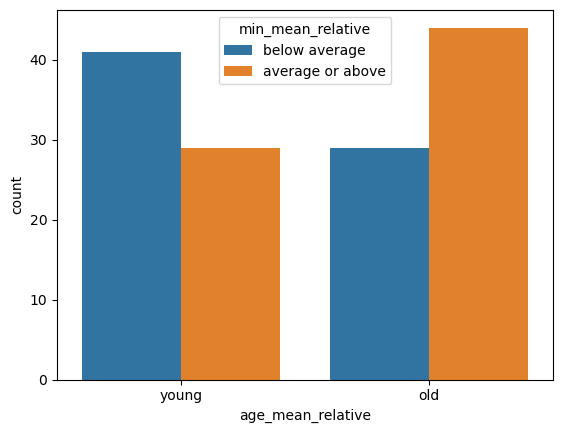

In [43]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

## Comparing Histograms

The easiest way to compare two histograms is to superimpose one on top of the other rather converting the variables to categorical as above

<AxesSubplot:ylabel='Frequency'>

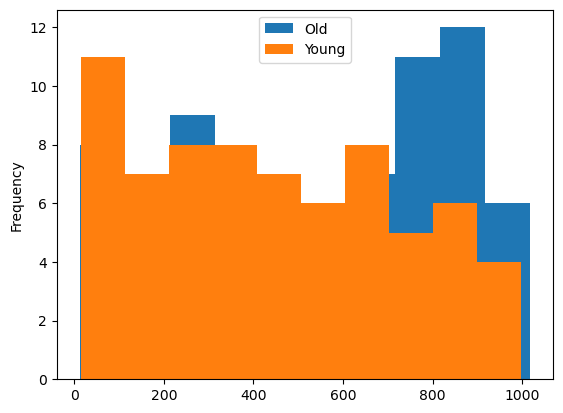

In [44]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can now see that most of the old players that belong to the "average or above" category play significantly more than average. The main downside of the visualization above is that the histogram for young players covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the histtype parameter and choose the 'step' type:

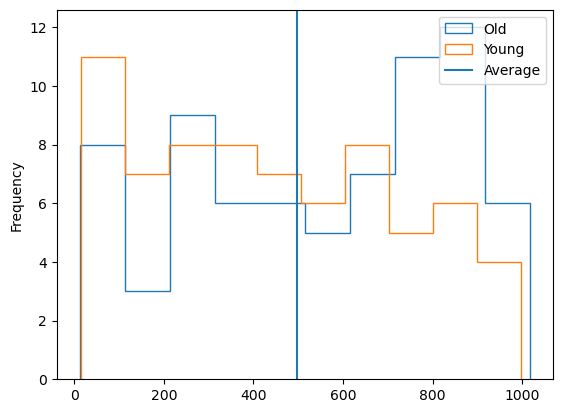

In [46]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(x=497, label="Average")
plt.legend()
plt.show()

## Kernel Density Estimate plots

Histograms can be smoothened by  `Series.plot.kde()` function:

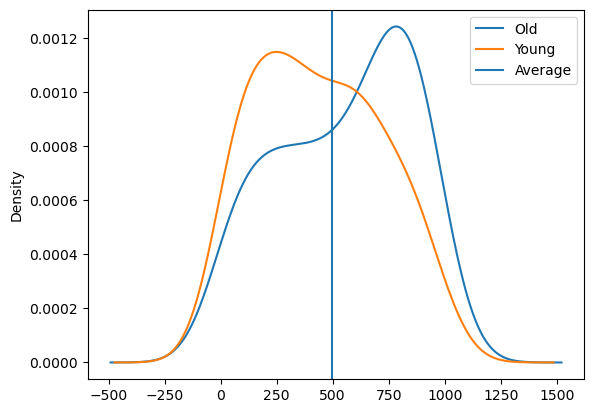

In [48]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497, label="Average")
plt.legend()
plt.show()

Each of the smoothed histograms above is called a kernel density estimate plot or, shorter, kernel density plot. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability value

Kernel density plots become cluttered quickly

<AxesSubplot:ylabel='Density'>

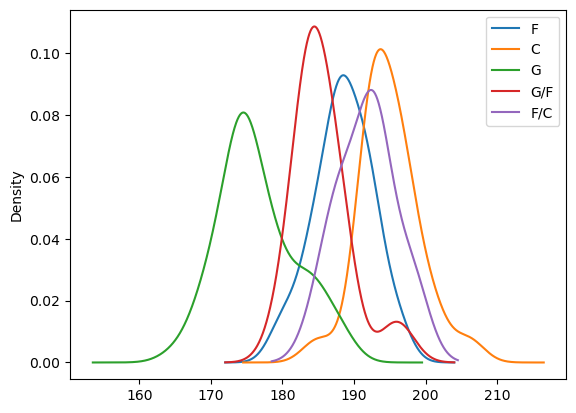

In [49]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

## Strip Plots

A strip plot is very simple to understand. It is basically a scatter plot that differentiates different categories. So, all the data that corresponds to each category is shown as a scatter plot, and all the observations and collected data that are visualized are shown, side-by-side on a single graph.

Strip plots are considered a good alternative to a box plot or a violin plot.



<AxesSubplot:xlabel='Pos', ylabel='Height'>

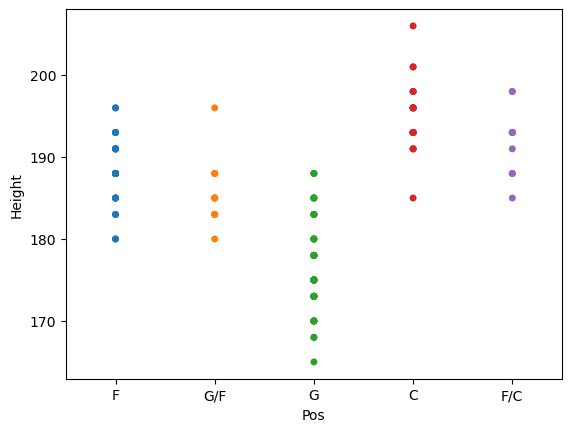

In [51]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter=False)

We can see on the graph that the shortest players are guards — in fact, all players under 180 cm are guards. The tallest players are centers — this is the only category with players above 2 meters. Among combined positions, we can see that F/C has slightly taller representatives — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A big downside of strip plots is that the bullet points overlap. We can fix this by adding a bit of jitter to each distribution. We can do this by setting the jitter parameter to True:

<AxesSubplot:xlabel='Pos', ylabel='Height'>

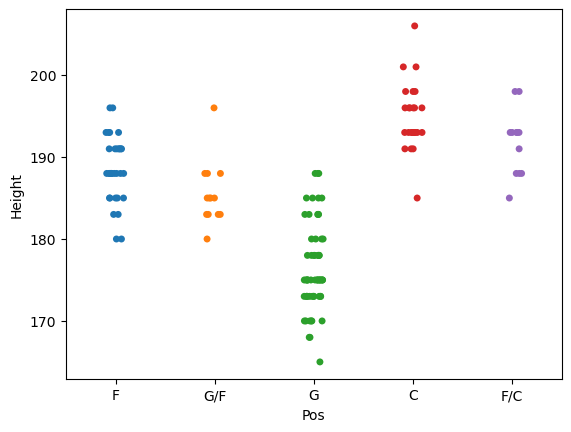

In [52]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter=True)

## Boxplots

<AxesSubplot:xlabel='Pos', ylabel='Height'>

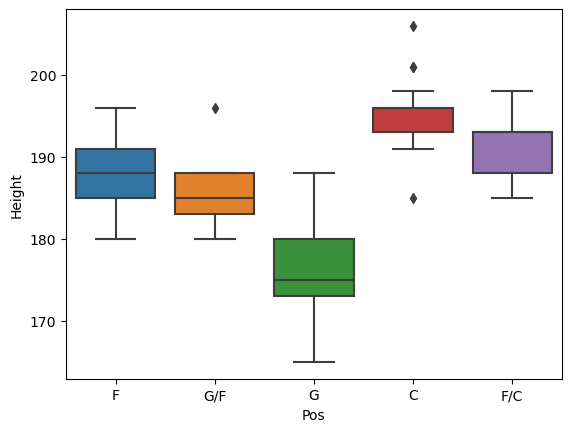

In [53]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

## Outliers

A value is an outlier if:

+ It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

+ It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).


<AxesSubplot:ylabel='Games Played'>

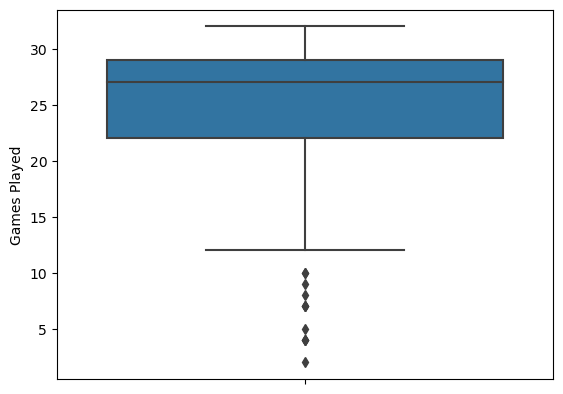

In [55]:
sns.boxplot( y = 'Games Played', data = wnba)

Summary

![plots](img/s1m5_summary.svg)